## Анализ и визуализация данных 

В этом датасете собраны демографические данные клиентов, информация об используемых услугах, а также финансовые показатели.

1. customerID: Идентификационный номер клиента.
2. gender: Пол клиента.
3. SeniorCitizen: Указывает, является ли клиент пожилым гражданином.
4. Partner: Указывает, есть ли у клиента партнер.
5. Dependents: Указывает, есть ли у клиента иждивенцы.
6. tenure: Количество месяцев, в течение которых клиент пользовался услугами компании.
7. PhoneService: Указывает, пользуется ли клиент телефонной связью.
8. MultipleLines: Указывает, пользуется ли клиент несколькими телефонными линиями.
9. InternetService: Тип интернет-услуг, которыми пользуется клиент.
10. OnlineSecurity: Указывает, подключена ли у клиента услуга онлайн-защиты.
11. OnlineBackup: Указывает, подключена ли у клиента услуга онлайн-резервного копирования.
12. DeviceProtection: Указывает, подключена ли у клиента услуга защиты устройства.
13. TechSupport: Указывает, подключена ли у клиента услуга технической поддержки.
14. StreamingTV: Указывает, пользуется ли клиент услугой потокового ТВ.
15. StreamingMovies: Указывает, пользуется ли клиент услугой потоковых фильмов.
16. Contract: Тип контракта клиента.
17. PaperlessBilling: Указывает, пользуется ли клиент безбумажной оплатой.
18. PaymentMethod: Способ оплаты клиента.
19. MonthlyCharges: Ежемесячные расходы клиента.
20. TotalCharges: Общие расходы клиента за всё время пользования услугами.
21. Churn: Указывает, ушел ли клиент (целевая переменная).
 

In [428]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [443]:
df = pd.read_csv('D:\Прогноз оттока\data\Клиенты.csv')
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [430]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [431]:
for col in df.columns:
    print(f"Уникальные значения в столбце '{col}': {df[col].unique()}")

Уникальные значения в столбце 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Уникальные значения в столбце 'gender': ['Female' 'Male']
Уникальные значения в столбце 'SeniorCitizen': [0 1]
Уникальные значения в столбце 'Partner': ['Yes' 'No']
Уникальные значения в столбце 'Dependents': ['No' 'Yes']
Уникальные значения в столбце 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Уникальные значения в столбце 'PhoneService': ['No' 'Yes']
Уникальные значения в столбце 'MultipleLines': ['No phone service' 'No' 'Yes']
Уникальные значения в столбце 'InternetService': ['DSL' 'Fiber optic' 'No']
Уникальные значения в столбце 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Уникальные значения в столбце 'OnlineBackup': ['Yes' 'No' 'No internet service']
Уникаль

In [432]:
# Фильтрация столбцов, в которых необходимо заменить значения
filtered_columns_for_replace = df.columns[df.nunique() == 3]

for col in filtered_columns_for_replace:
    df[col] = df[col].apply(lambda x: 'No' if 'No ' in str(x) else x)

# Фильтрация столбцов для факторизации
filtered_columns_for_factorize = df.columns[df.nunique() <= 4]

for col in filtered_columns_for_factorize:
    df[col] = pd.factorize(df[col])[0]

# Удаление столбца customerID
df = df.drop(['customerID'], axis=1)

# Преобразование TotalCharges в числовой тип и заполнение пропусков
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Создание новых признаков
df['MonthlyCharges_per_tenure'] = df['MonthlyCharges'] / df['tenure'].replace(0, 1)  

df['TotalCharges_per_Month'] = df['TotalCharges'] / df['tenure'].replace(0, 1)  

services = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['Service_Count'] = df[services].sum(axis=1)

df['Has_Streaming'] = (df['StreamingTV'] == 1) | (df['StreamingMovies'] == 1)
df['Has_Streaming'] = df['Has_Streaming'].astype(int)

df['Tenure_Squared'] = df['tenure'] ** 2

df['Tenure_Log'] = np.log(df['tenure'] + 1)  

df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Замена inf на NaN
df.fillna(df.mean(), inplace=True)  # Заполнение NaN средними значениями

# Проверка уникальных значений в каждом столбце
for col in df.columns:
    print(f"Уникальные значения в столбце '{col}': {df[col].unique()}")

Уникальные значения в столбце 'gender': [0 1]
Уникальные значения в столбце 'SeniorCitizen': [0 1]
Уникальные значения в столбце 'Partner': [0 1]
Уникальные значения в столбце 'Dependents': [0 1]
Уникальные значения в столбце 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Уникальные значения в столбце 'PhoneService': [0 1]
Уникальные значения в столбце 'MultipleLines': [0 1]
Уникальные значения в столбце 'InternetService': [0 1 2]
Уникальные значения в столбце 'OnlineSecurity': [0 1]
Уникальные значения в столбце 'OnlineBackup': [0 1]
Уникальные значения в столбце 'DeviceProtection': [0 1]
Уникальные значения в столбце 'TechSupport': [0 1]
Уникальные значения в столбце 'StreamingTV': [0 1]
Уникальные значения в столбце 'StreamingMovies': [0 1]
Уникальные значения в столбце 'Contract': [0 1 2]
Уникальны

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     7043 non-null   int64  
 1   SeniorCitizen              7043 non-null   int64  
 2   Partner                    7043 non-null   int64  
 3   Dependents                 7043 non-null   int64  
 4   tenure                     7043 non-null   int64  
 5   PhoneService               7043 non-null   int64  
 6   MultipleLines              7043 non-null   int64  
 7   InternetService            7043 non-null   int64  
 8   OnlineSecurity             7043 non-null   int64  
 9   OnlineBackup               7043 non-null   int64  
 10  DeviceProtection           7043 non-null   int64  
 11  TechSupport                7043 non-null   int64  
 12  StreamingTV                7043 non-null   int64  
 13  StreamingMovies            7043 non-null   int64

### Корреляционная матрица


Text(0.5, 1.0, 'Correlation Heatmap')

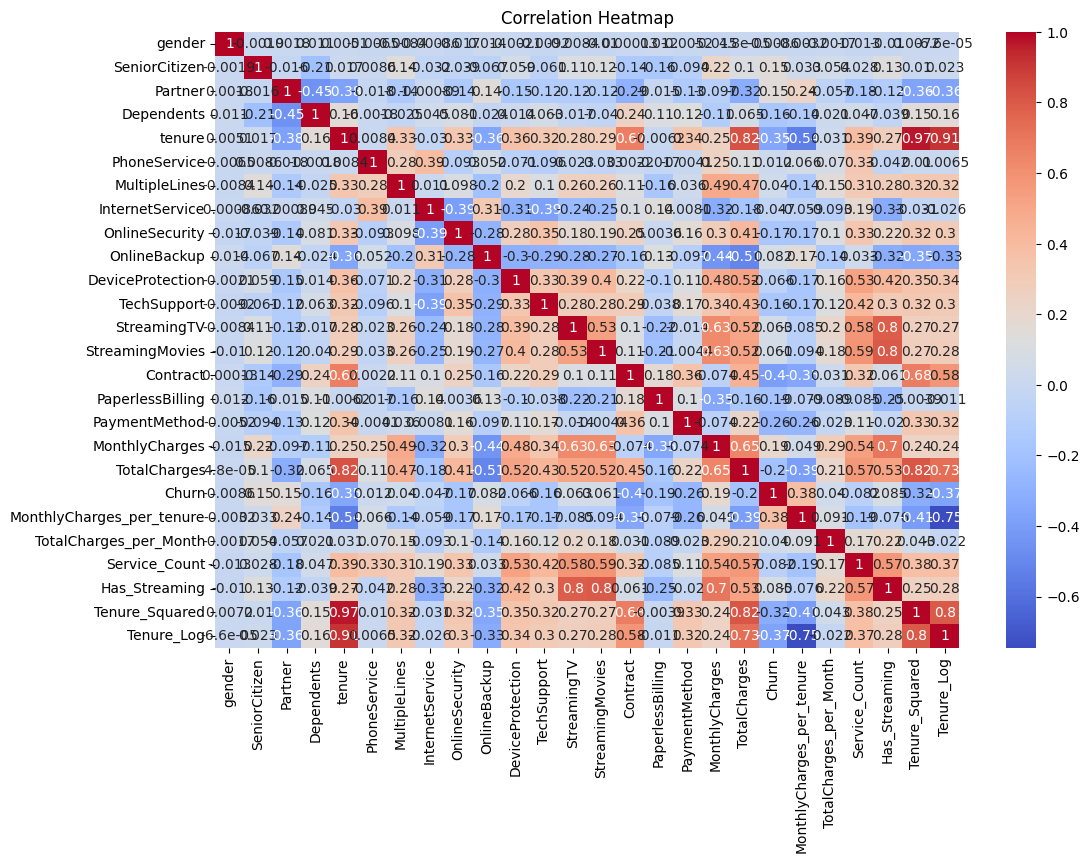

In [434]:
target_variable_name = 'Churn'
# Определение корреляции признаков с целевой переменной
correlation = df.corr()[target_variable_name].sort_values(ascending=False)

# Визуализация корреляции с использованием тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

In [435]:
df = df.drop(columns=['gender', 'PhoneService'])

По получившейся матрице видно, что такие столбцы как 'gender' и 'PhoneService' не ооказывают большокго влияния на целевую переменну, но в связи с небольшм количесвтом входных данных в датасете они не будут удаляться 

## Обучение модели

В качестве модели выбран Случайный лес, так как он хорошо работает с категриальными и числовыми данными

In [436]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import make_scorer, roc_auc_score, f1_score

### Разделение данных на тестовую и обучабщую выборки

In [437]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Churn']) #признаки
y = df['Churn'] #целевая 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = pd.DataFrame(X_test, columns=df.drop(columns=['Churn']).columns)

In [438]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(confusion_matrix(y_test, y_pred))


In [439]:
scoring = {
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True),  # ROC-AUC требует вероятности
    'f1': make_scorer(f1_score)  # F1-score требует предсказанных классов
}

#### Модель 1: Случайный лес

In [440]:
rf_model = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [300, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    #'n_estimators': [300, 500],
    'min_samples_split': [2, 5, 7, 9],
    'min_samples_leaf': [1, 2, 3, 5]
}

# Поиск лучших параметров
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring=scoring, refit='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Лучшая модель
best_rf = rf_grid.best_estimator_
print("Лучшие параметры для Random Forest:", rf_grid.best_params_)

# Оценка Random Forest
print("\nОценка Random Forest:")
evaluate_model(best_rf, X_test, y_test)

Лучшие параметры для Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 500}

Оценка Random Forest:
Accuracy: 0.8133
F1-score: 0.5922
ROC-AUC: 0.8591
[[955  81]
 [182 191]]


#### Модель 2: Градиентный спуск

In [442]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Параметры для GridSearchCV
xgb_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [2, 3, 5, 7],
    'learning_rate': [0.01, 0.03, 0.1],
    'subsample': [0.6, 0.8, 1.0, 1.2],
    'colsample_bytree': [0.6, 0.8, 1.0, 1.2]
}

# Поиск лучших параметров
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring=scoring, refit='f1', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

# Лучшая модель
best_xgb = xgb_grid.best_estimator_
print("Лучшие параметры для XGBoost:", xgb_grid.best_params_)

# Оценка XGBoost
print("\nОценка XGBoost:")
evaluate_model(best_xgb, X_test, y_test)

with open('D:\Прогноз оттока\models\model.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)

Лучшие параметры для XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}

Оценка XGBoost:
Accuracy: 0.8133
F1-score: 0.6161
ROC-AUC: 0.8595
[[935 101]
 [162 211]]


Обе модели показывают схожую точность Accuracy и качество разделения классов ROC-AUC, но градиентный бустинг немного лучше справляется с предсказанием оттока (F1-score)

In [ ]:
import pickle
with open('D:\Прогноз оттока\models\model.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)